In [1]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/DS assigment/Logistic Regression/Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df_test=pd.read_csv('/content/drive/MyDrive/DS assigment/Logistic Regression/Titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_test.shape

(418, 11)

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
df_test.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


In [13]:
df_train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [14]:
df_test.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [15]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [17]:
df_train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [18]:
df_test.nunique()

,0
PassengerId,418
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169
Cabin,76


In [19]:
num_col = df_train.select_dtypes(include=['number']).columns
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [20]:
cat_col=df_train.select_dtypes(include=['object']).columns
cat_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

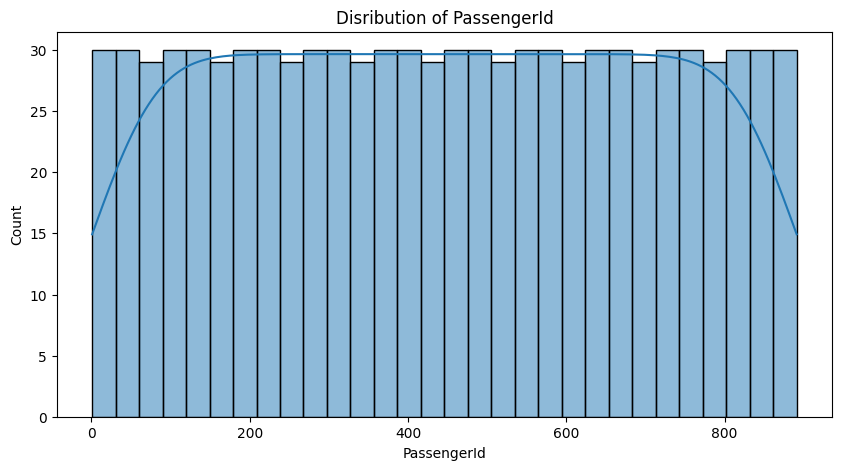

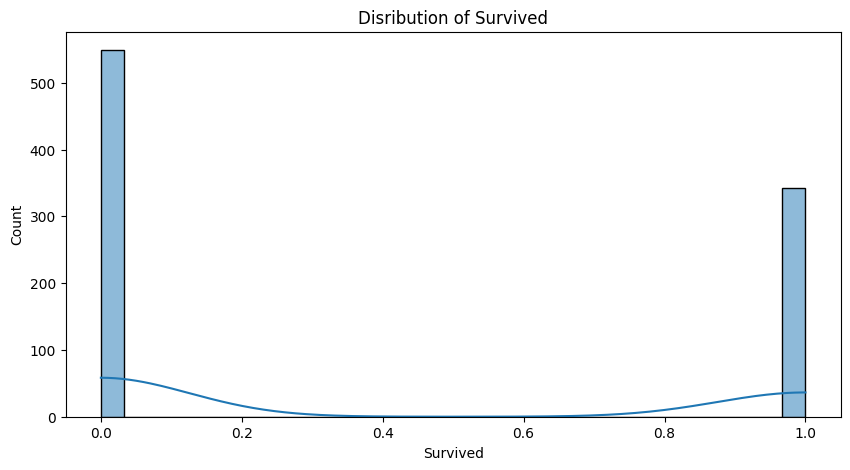

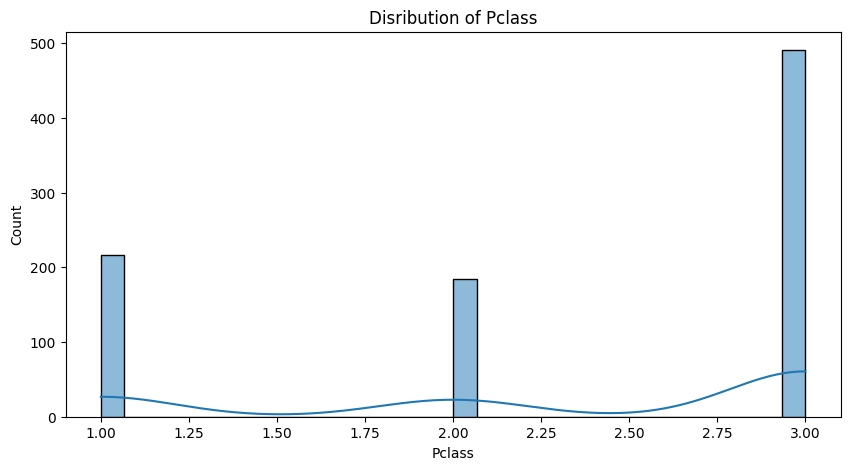

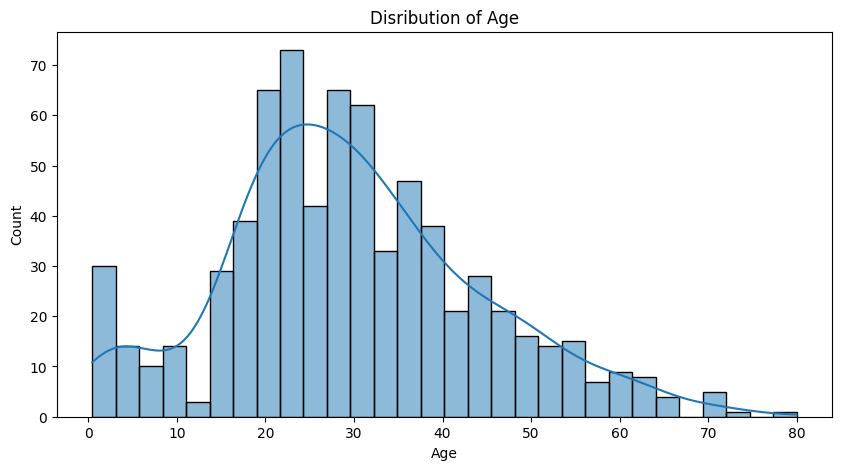

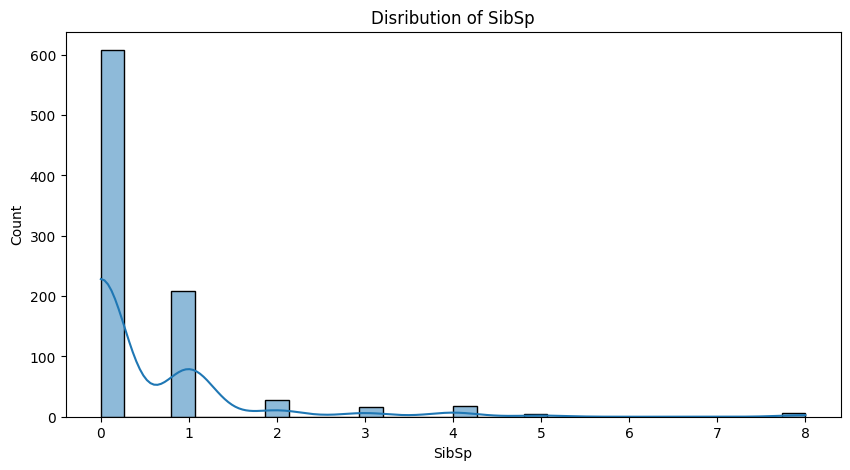

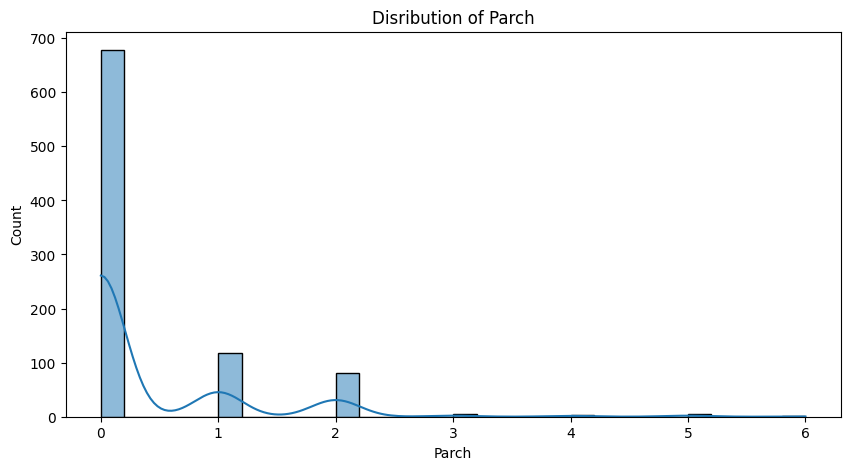

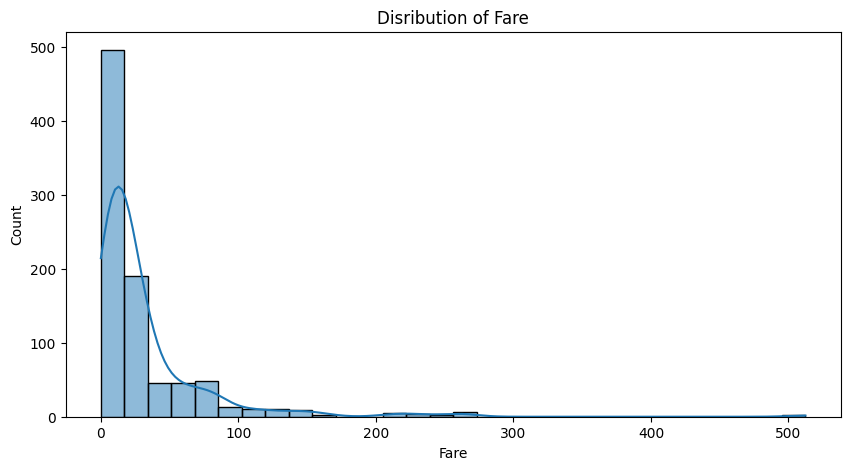

In [22]:
for i in df_train.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df_train[i], bins =30, kde=True)
  plt.title(f"Disribution of {i}")
  plt.show()

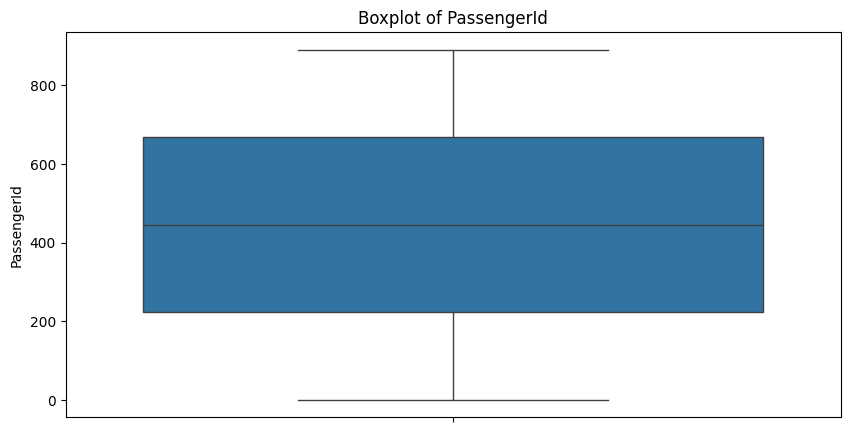

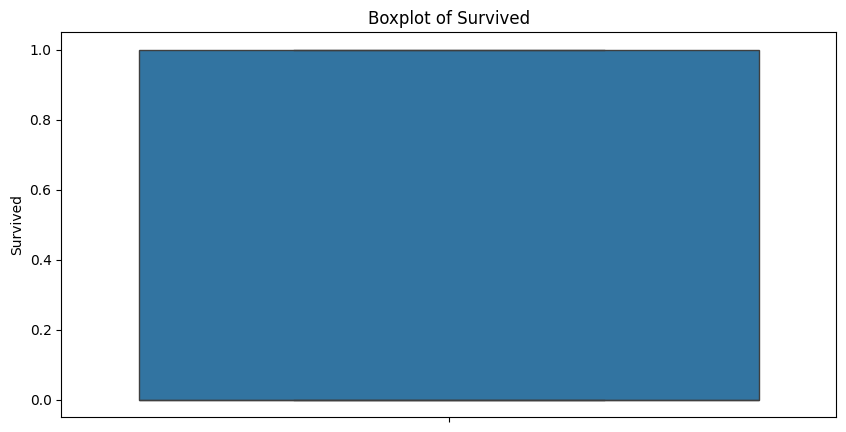

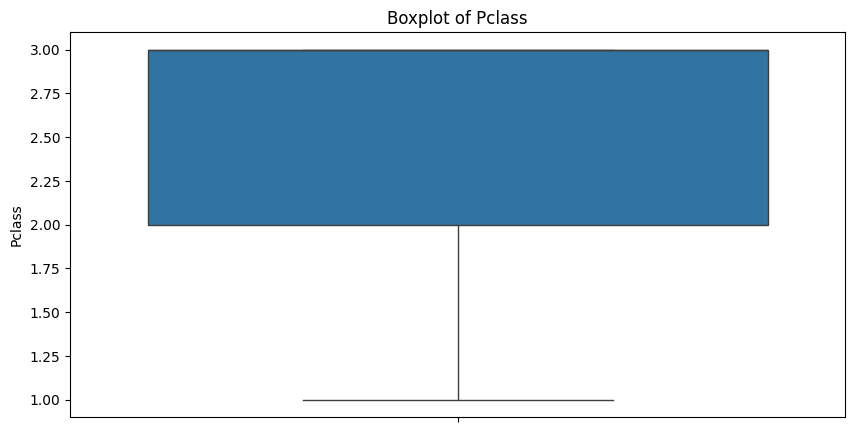

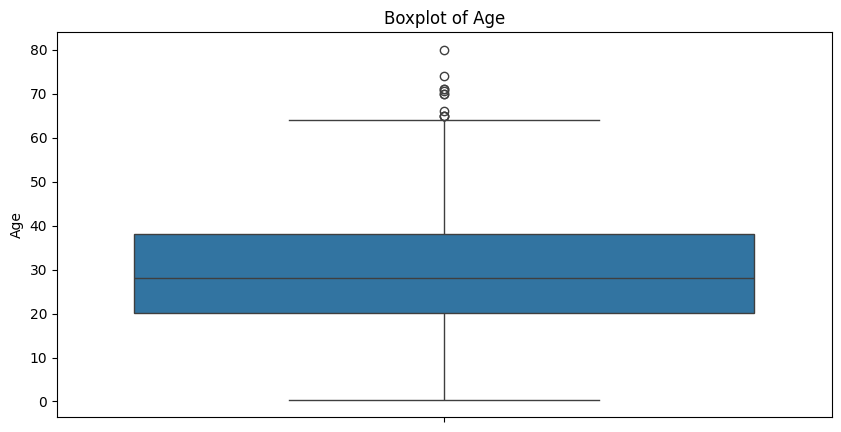

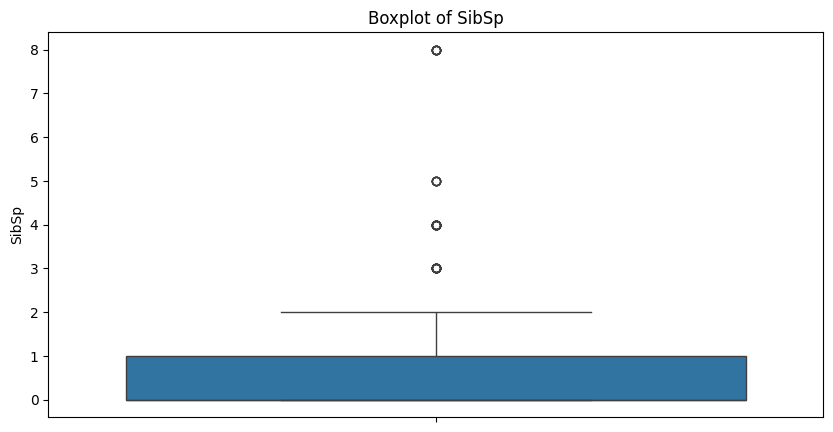

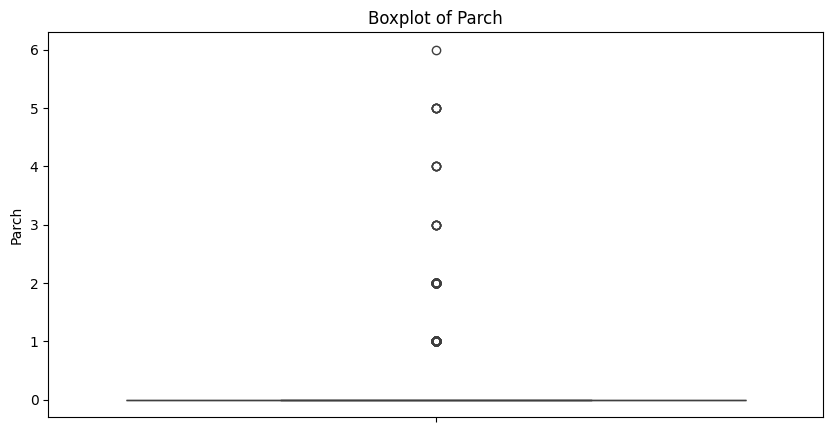

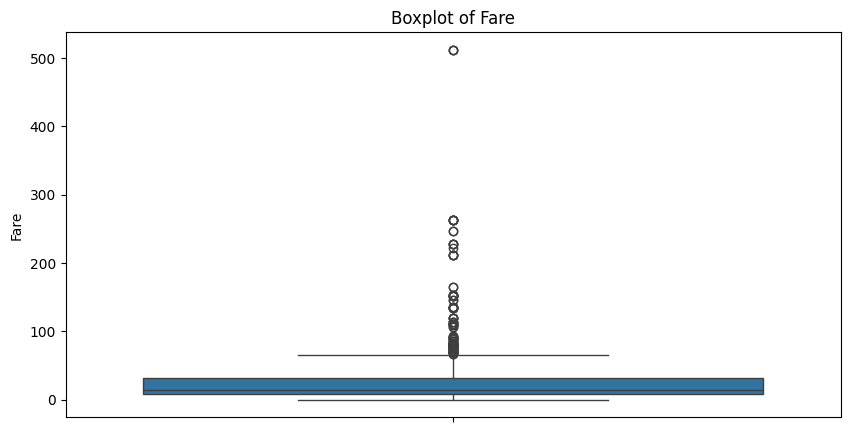

In [23]:
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(df_train[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

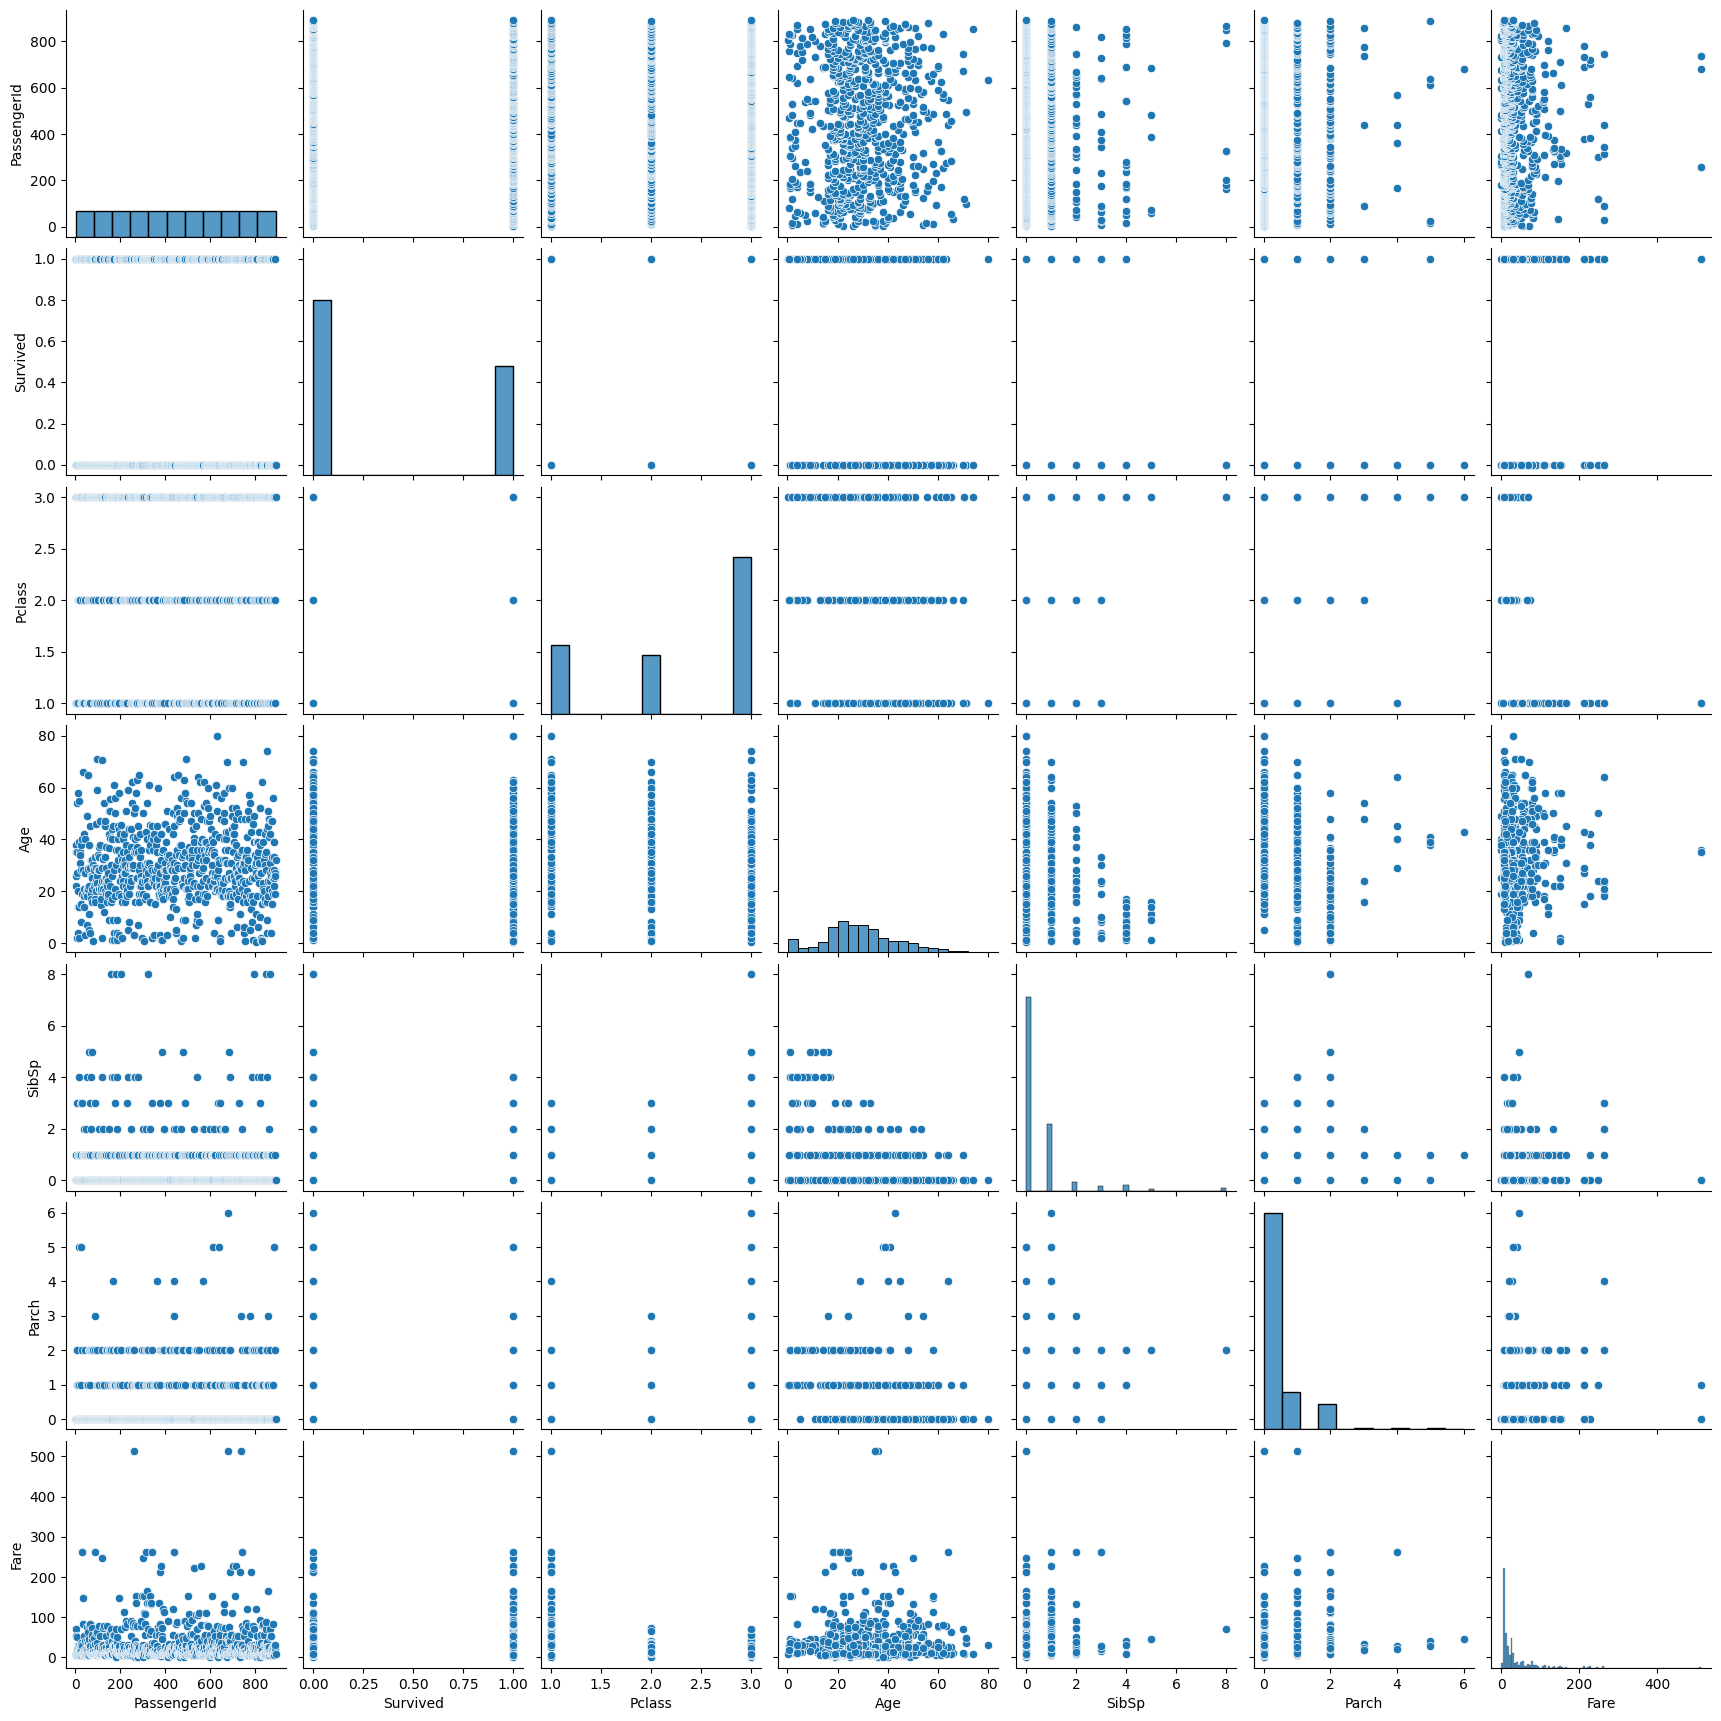

In [24]:
sns.pairplot(df_train)

<Axes: >

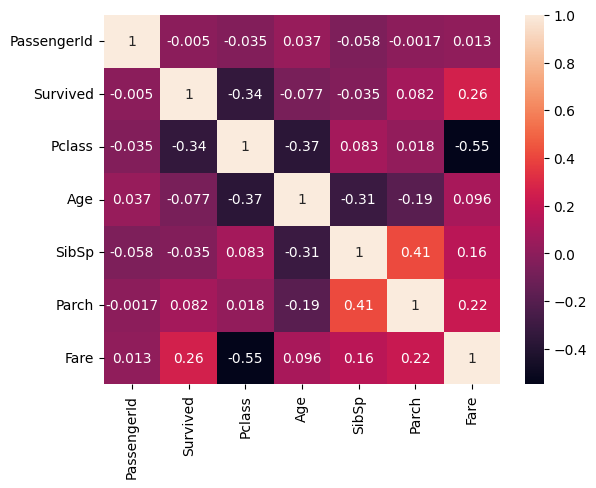

In [25]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True)

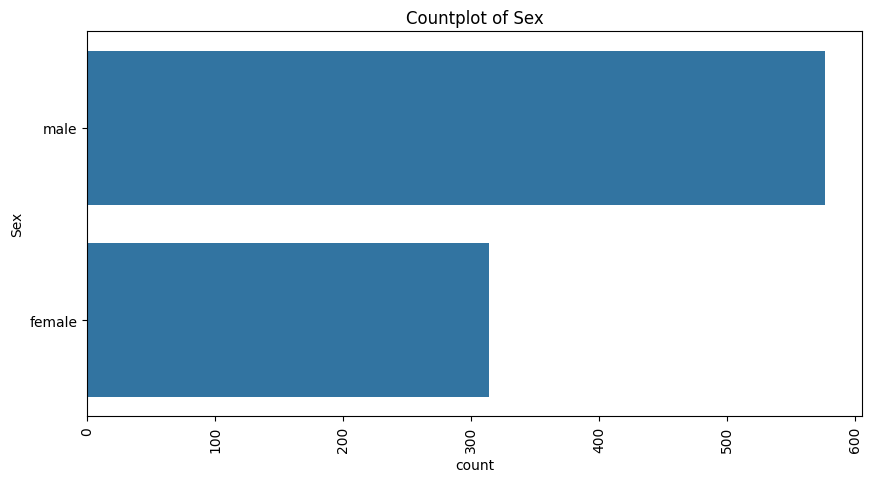

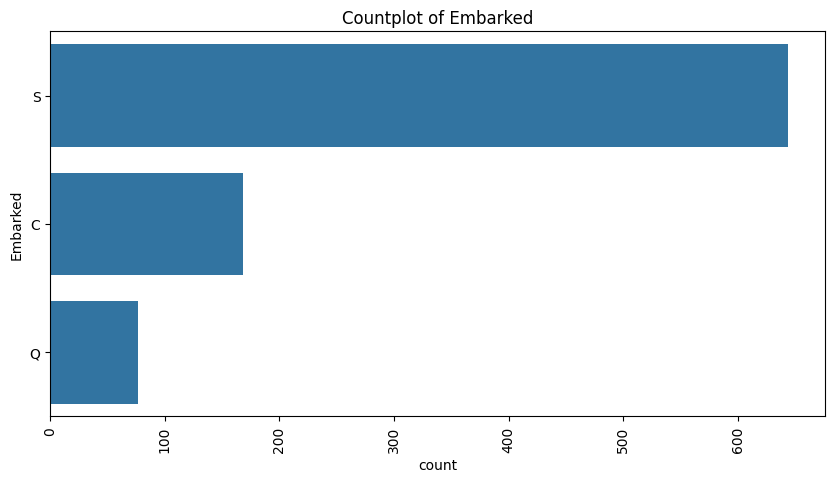

In [26]:
for i in cat_col[~cat_col.isin(['Name', 'Cabin', 'Ticket'])]:
  plt.figure(figsize=(10,5))
  sns.countplot(df_train[i])
  plt.title(f'Countplot of {i}')
  plt.xticks(rotation=90)
  plt.show()

In [27]:
for i in ['Name', 'Ticket', 'Cabin']:
  print(f"Top 5 most comman values in {i} are:")
  print(df_train[i].value_counts().head(5))
  print("\n")

Top 5 most comman values in Name are:
Name
Braund, Mr. Owen Harris             1
Boulos, Mr. Hanna                   1
Frolicher-Stehli, Mr. Maxmillian    1
Gilinski, Mr. Eliezer               1
Murdlin, Mr. Joseph                 1
Name: count, dtype: int64


Top 5 most comman values in Ticket are:
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: count, dtype: int64


Top 5 most comman values in Cabin are:
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: count, dtype: int64




In [28]:
df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [29]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [31]:
for i in num_col:
  df_train[i]=df_train[i].fillna(df_train[i].median())

In [32]:
for i in cat_col:
  df_train[i]=df_train[i].fillna(df_train[i].mode()[0])

In [33]:
for i in num_col:
  if i in df_test.columns: # Check if column exists in df_test
    df_test[i]=df_test[i].fillna(df_test[i].median()) # Impute numerical features with median

for i in cat_col:
  if i in df_test.columns: # Check if column exists in df_test
    df_test[i]=df_test[i].fillna(df_test[i].mode()[0]) # Impute categorical features with mode

In [34]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
df_train.shape

(891, 12)

In [36]:
q1=df_train[num_col].quantile(0.25)
q3=df_train[num_col].quantile(0.75)
iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

for i in num_col:
  df_train =df_train[(df_train[i]>=lower_bound[i]) & (df_train[i] <= upper_bound[i])]

In [37]:
df_train=df_train.reset_index(drop=True)

In [38]:
df_train.shape

(577, 12)

In [39]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.0,577.000000
mean,450.590988,0.299827,2.502600,29.303293,0.199307,0.0,14.926356
std,259.568357,0.458579,0.733909,8.551663,0.445034,0.0,12.606521
min,1.000000,0.000000,1.000000,5.000000,0.000000,0.0,0.000000
25%,222.000000,0.000000,2.000000,24.000000,0.000000,0.0,7.775000
50%,455.000000,0.000000,3.000000,28.000000,0.000000,0.0,8.662500
75%,676.000000,1.000000,3.000000,32.500000,0.000000,0.0,15.850000
max,891.000000,1.000000,3.000000,54.000000,2.000000,0.0,61.175000


In [40]:
cat_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [41]:
df_train[cat_col].nunique()

,0
Name,577
Sex,2
Ticket,527
Cabin,62
Embarked,3


In [42]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in ['Sex', 'Embarked']:
  df_train[i]=lb.fit_transform(df_train[i])
  df_test[i]=lb.fit_transform(df_test[i])

In [43]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
3,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2
4,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,B96 B98,1
...,...,...,...,...,...,...,...,...,...,...,...,...
572,885,0,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,B96 B98,2
573,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,B96 B98,2
574,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
575,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [44]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,B57 B59 B63 B66,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,2
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,B57 B59 B63 B66,2


In [45]:
from sklearn.model_selection import train_test_split

# Define x_train and y_train using your DataFrame
x_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features for training
y_train = df_train['Survived']  # Target variable

# Now split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)  # 80% train, 20% validation

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred=lr.predict(x_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_train, y_pred))

[[280  37]
 [ 49  95]]


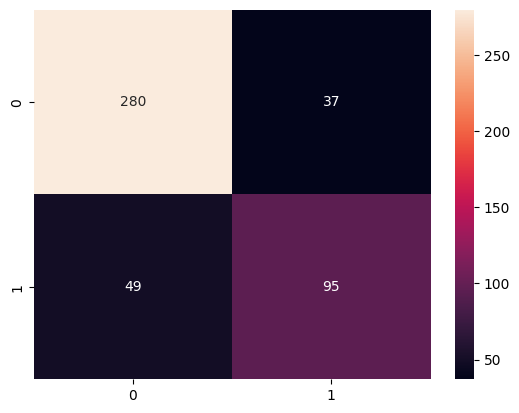

In [49]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='g')
plt.show()

In [50]:
print(accuracy_score(y_train, y_pred))

0.8134490238611713


In [51]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       317
           1       0.72      0.66      0.69       144

    accuracy                           0.81       461
   macro avg       0.79      0.77      0.78       461
weighted avg       0.81      0.81      0.81       461



In [52]:
y_pred_val = lr.predict(x_val)
y_pred_val  # Predictions for validation set

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [53]:
# Assuming 'lr' is your fitted Logistic Regression model and 'df_test' is your test data
x_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features for testing
y_pred_test = lr.predict(x_test)  # Predictions for the test set

# Create the submission DataFrame
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred_test})
submission.to_csv('submission.csv', index=False)  # Save predictions to CSV

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_pred_val)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")

Accuracy: 0.8189655172413793
Precision: 0.6333333333333333
Recall: 0.6551724137931034
F1-score: 0.6440677966101694
ROC-AUC score: 0.7643678160919541


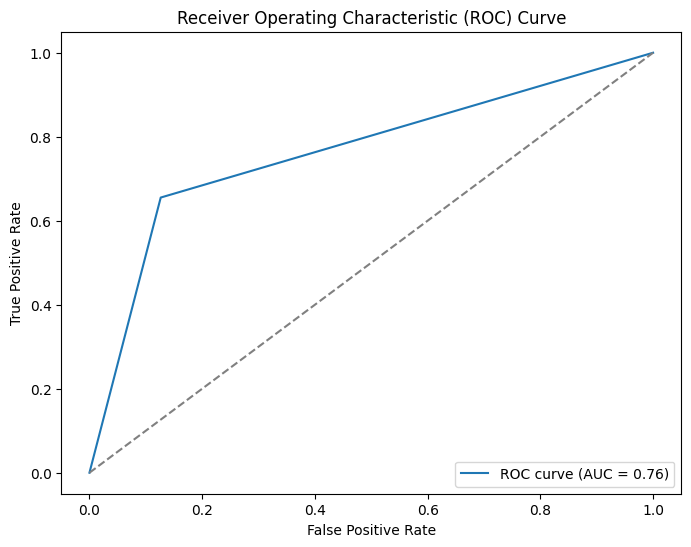

In [55]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [56]:
coefficients=lr.coef_[0]
coefficients

array([-0.33135314, -2.61205072, -0.01054466, -0.65741391,  0.        ,
        0.04923449, -0.22869013])

In [57]:
for i,j in zip(x_train.columns, coefficients):
  print(f"{i}: {j}")

Pclass: -0.33135314268798466
Sex: -2.6120507248343903
Age: -0.010544660111146107
SibSp: -0.6574139062314773
Parch: 0.0
Fare: 0.0492344853091081
Embarked: -0.22869012954142612


Interpretation:

* Pclass: A negative coefficient (-0.33) suggests that higher passenger class (e.g., 1st class compared to 3rd class) is associated with a decrease in the probability of survival. This aligns with the expectation that passengers in lower classes had a lower survival rate.
* Sex: A large negative coefficient (-2.61) for Sex indicates that being male (assuming 'Sex' is encoded as 0 for male and 1 for female) significantly decreases the probability of survival. This supports the common observation that females had a higher survival rate.
* Age: A small negative coefficient (-0.01) for Age implies that older age is associated with a slight decrease in the probability of survival. This is expected, as younger individuals might have had a survival advantage.
* SibSp: A negative coefficient (-0.66) for SibSp suggests that having more siblings or spouses on board is associated with a decrease in the probability of survival. This could be due to factors like difficulty in evacuating together or having to care for family members.
* Parch: A coefficient of 0 for Parch indicates that the number of parents or children on board does not have a significant impact on the probability of survival according to the model.
* Fare: A positive coefficient (0.05) for Fare suggests that higher fare is associated with a slight increase in the probability of survival. This could reflect the fact that wealthier passengers had access to better accommodations and lifeboats.
* Embarked: A negative coefficient (-0.23) for Embarked might indicate that the port of embarkation has some influence on survival. This would require further investigation into how the 'Embarked' variable is encoded and the potential reasons behind this effect.

Feature Significance

The significance of a feature in predicting survival probability can be assessed by considering the magnitude and sign of its coefficient, as well as its statistical significance (if you've calculated p-values).

Important Features

Sex: Based on the large negative coefficient (-2.61), 'Sex' appears to be the most significant predictor in this model. Being male significantly decreases the likelihood of survival.
Pclass: The negative coefficient (-0.33) for 'Pclass' suggests that lower passenger classes have lower survival probabilities, which aligns with historical accounts.
SibSp: The negative coefficient (-0.66) for 'SibSp' indicates that having more siblings or spouses on board is associated with lower survival odds.
Moderately Important Features

Fare: The positive coefficient (0.05) for 'Fare' suggests a slight increase in survival probability with higher fares. This could be because wealthier passengers had better access to lifeboats or accommodations.
Embarked: The negative coefficient (-0.23) for 'Embarked' indicates some influence of the port of embarkation on survival. However, further analysis would be needed to fully understand this effect.
Age: The small negative coefficient (-0.01) for 'Age' suggests a slight decrease in survival probability with increasing age.
Less Important Feature

Parch: The coefficient of 0 for 'Parch' suggests that the number of parents or children on board has little or no significant impact on survival probability according to this model.
Caveats and Further Analysis

Correlation: It's important to remember that correlation does not imply causation. While these features are associated with survival, it doesn't necessarily mean they directly caused it.
Interactions: The model assumes that the effect of each feature is independent of others. In reality, there could be interactions between features (e.g., the effect of 'Pclass' might differ depending on 'Sex'). You could explore these interactions by adding interaction terms to your model.
Statistical Significance: To get a more comprehensive understanding of feature significance, it's useful to calculate p-values for the coefficients. Features with low p-values (typically less than 0.05) are considered statistically significant.
Summary

Based on this analysis, 'Sex', 'Pclass', and 'SibSp' appear to be the most important features in predicting survival probability in the Titanic dataset, according to your logistic regression model. Other features like 'Fare', 'Embarked', and 'Age' have a lesser but still notable impact.

In [58]:
!pip install streamlit

In [59]:
import pickle # Imports the pickle module for object serialization

# Assuming 'lr' is your trained logistic regression model
with open('titanic_model.pkl', 'wb') as file:  # Opens a file named 'titanic_model.pkl' in write binary ('wb') mode
    pickle.dump(lr, file) # Saves the 'lr' model object to the opened file using pickle.dump()

In [60]:
%%writefile app.py
# This line is a "magic command" in Colab/Jupyter to write the following code into a file named "app.py"

import streamlit as st # Imports the Streamlit library for creating web apps
import pandas as pd # Imports the Pandas library for data manipulation
import pickle  # Imports the pickle module for loading the saved model

# Load your trained model
with open('titanic_model.pkl', 'rb') as file:  # Opens the file where the model is saved in read binary ('rb') mode
    model = pickle.load(file) # Loads the model from the file using pickle.load()

# App title
st.title('Titanic Survival Prediction') # Sets the title of the Streamlit app

# User input features
# The following lines create input elements for the user to enter passenger information:
pclass = st.selectbox('Passenger Class', [1, 2, 3]) # Dropdown for passenger class
sex = st.radio('Sex', ['Male', 'Female']) # Radio buttons for sex
age = st.number_input('Age', min_value=0, max_value=100, value=25) # Number input for age
sibsp = st.number_input('Number of Siblings/Spouses', min_value=0, max_value=10, value=0) # Number input for siblings/spouses
parch = st.number_input('Number of Parents/Children', min_value=0, max_value=10, value=0) # Number input for parents/children
fare = st.number_input('Fare', min_value=0.0, value=10.0) # Number input for fare
embarked = st.selectbox('Embarked', ['Southampton', 'Cherbourg', 'Queenstown']) # Dropdown for embarkation port

# Convert categorical features to numerical
# The model needs numerical input, so we convert 'sex' and 'embarked' to numbers:
sex_encoded = 1 if sex == 'Female' else 0 # Assigns 1 for 'Female' and 0 for 'Male'
embarked_encoded = {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}[embarked] # Assigns numerical values to embarkation ports

# Create input data for prediction
# Creates a Pandas DataFrame with the user inputs to be fed to the model:
input_data = pd.DataFrame([[pclass, sex_encoded, age, sibsp, parch, fare, embarked_encoded]],
                             columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

# Predict survival
if st.button('Predict'): # When the "Predict" button is clicked:
    prediction = model.predict(input_data)[0] # Makes a prediction using the loaded model
    if prediction == 1: # If the prediction is 1 (survival):
        st.success('This passenger is likely to survive.') # Displays a success message
    else: # If the prediction is 0 (non-survival):
        st.error('This passenger is likely to not survive.') # Displays an error message

Overwriting app.py


In summary, this code creates a Streamlit web application that takes user input for passenger features, uses a pre-trained machine learning model to predict the passenger's survival likelihood, and displays the prediction to the user.

In [61]:
import pickle

# Assuming 'lr' is your trained logistic regression model
with open('titanic_model.pkl', 'wb') as file:  # Replace with your desired filename
    pickle.dump(lr, file)

Input Values for Likely Survival

* Pclass: 1 (1st class)
* Sex: Female
* Age: 25
* SibSp: 0 (No siblings or spouses)
* Parch: 0 (No parents or children)
* Fare: 100 (A relatively high fare)
* Embarked: Cherbourg (Embarked from Cherbourg)


Input Values for Likely Non-Survival

* Pclass: 3 (3rd class)
* Sex: Male
* Age: 40
* SibSp: 3 (Several siblings or spouses)
* Parch: 2 (Parents or children on board)
* Fare: 10 (A lower fare)
* Embarked: Southampton (Embarked from Southampton)

In [62]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.172.54.207:8501

⠴⠦⠧your url is: https://warm-ants-wonder.loca.lt
2025-03-16 16:15:59.302 Uncaught exception GET /_stcore/stream (127.0.0.1)
HTTPServerRequest(protocol='http', host='warm-ants-wonder.loca.lt', method='GET', uri='/_stcore/stream', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 345, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tornado/websocket.py", line 938, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
                  ^